# Visualizing Chipotle's Data
##### This time we are going to pull data directly from the internet. Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [21]:
%matplotlib inline

### Step 2. Import the dataset from this address: https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv
### Step 3. Assign it to a variable called chipo.

In [22]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_table(url, sep='\t')

In [23]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 4. See the first 10 entries

In [24]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [25]:
top_5 = pd.DataFrame(chipo.groupby('item_name').sum()['quantity'].sort_values(ascending = False).head(5))

In [26]:
top_5

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


([array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])],
 array([351., 392., 433., 474., 515., 556., 597., 638., 679., 720., 761.]),
 <a list of 5 Lists of Patches objects>)

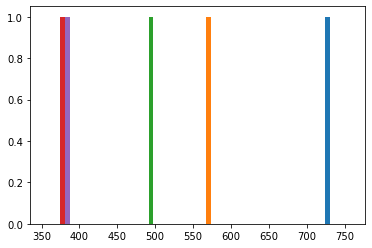

In [27]:
plt.hist(top_5)

In [28]:
import seaborn as sn

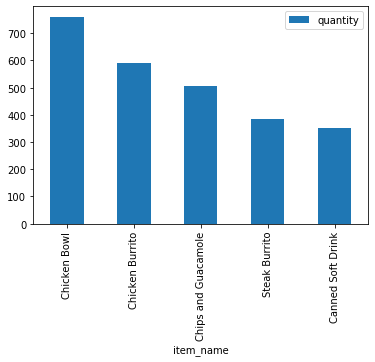

In [29]:
top_5.plot(kind = 'bar')

### Step 6. Create a scatterplot with the number of items orderered per order price
###### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [37]:
chipo.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [41]:
chipo['item_price'] = chipo['item_price'].replace('[\$,]', '', regex=True).astype(float)

In [42]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


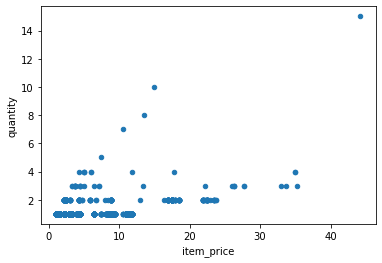

In [43]:
chipo.plot(kind='scatter', x='item_price', y='quantity')

In [44]:
orders = chipo.groupby('order_id').sum()

In [46]:
orders.head()

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70


(0, 36.71131197008484)

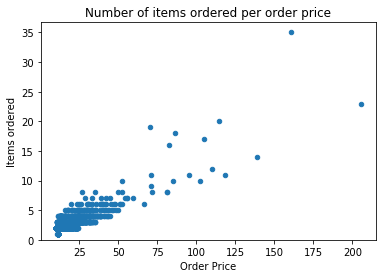

In [50]:
orders.plot(kind='scatter', x='item_price', y='quantity')
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)

# Visualizing the Titanic Disaster
### Introduction:
##### This exercise is based on the titanic Disaster dataset avaiable at Kaggle: https://www.kaggle.com/c/titanic
##### To know more about the variables check here: https://www.kaggle.com/c/titanic/data

### Step 1. Import the necessary libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Step 2. Import the dataset from this address: https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv
### Step 3. Assign it to a variable titanic

In [8]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv'
titanic = pd.read_csv(url)

In [9]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 4. Set PassengerId as the index

In [15]:
titanic.set_index('PassengerId').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 5. Create a pie chart presenting the male/female proportion

In [20]:
males = titanic[titanic['Sex'] == 'male'].sum()
females = titanic[titanic['Sex'] == 'female'].sum()

In [21]:
proportions = ['males', 'females']

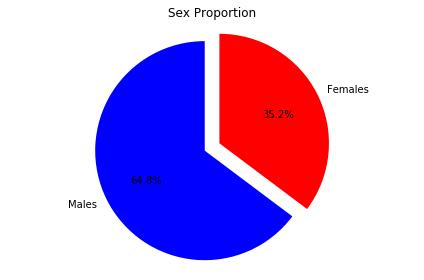

In [23]:
males = (titanic['Sex'] == 'male').sum()
females = (titanic['Sex'] == 'female').sum()

# put them into a list called proportions
proportions = [males, females]

# Create a pie chart
plt.pie(
    # using proportions
    proportions,
    
    # with the labels being officer names
    labels = ['Males', 'Females'],
    
    # with no shadows
    shadow = False,
    
    # with colors
    colors = ['blue','red'],
    
    # with one slide exploded out
    explode = (0.15 , 0),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Sex Proportion")

# View the plot
plt.tight_layout()
plt.show()

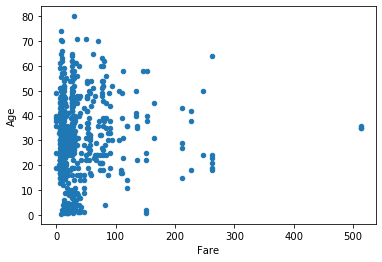

In [38]:
titanic.plot(kind='scatter', x='Fare', y='Age')

(-5, 85)

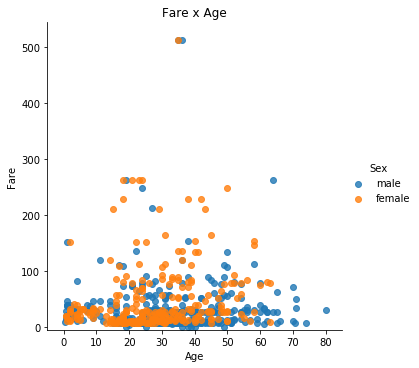

In [27]:
# creates the plot using
lm = sns.lmplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Sex', fit_reg=False)

# set title
lm.set(title = 'Fare x Age')

# get the axes object and tweak it
axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)

### Step 7. How many people survived?

In [28]:
titanic['Survived'].sum()

342

### Step 8. Create a histogram with the Fare payed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A989E09160>]],
      dtype=object)

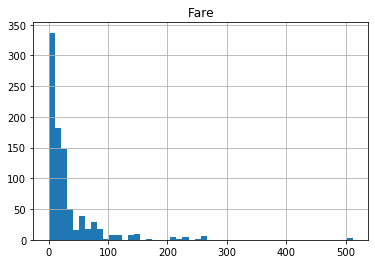

In [31]:
titanic.hist(column='Fare', bins=50)

# Scores
### Introduction:
##### This time you will create the data.

##### Exercise based on Chris Albon (http://chrisalbon.com/) work, the credits belong to him.

### Step 1. Import the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Step 2. Create the DataFrame that should look like the one below.

In [32]:
raw_data = {'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
            'last_name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze'], 
            'female': [0, 1, 1, 0, 1],
            'age': [42, 52, 36, 24, 73], 
            'preTestScore': [4, 24, 31, 2, 3],
            'postTestScore': [25, 94, 57, 62, 70]}

df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'female', 'preTestScore', 'postTestScore'])

df

,first_name,last_name,age,female,preTestScore,postTestScore
0,Jason,Miller,42,0,4,25
1,Molly,Jacobson,52,1,24,94
2,Tina,Ali,36,1,31,57
3,Jake,Milner,24,0,2,62
4,Amy,Cooze,73,1,3,70


### Step 3. Create a Scatterplot of preTestScore and postTestScore, with the size of each point determined by age
##### Hint: Don't forget to place the labels

Text(0, 0.5, 'preTestScore')

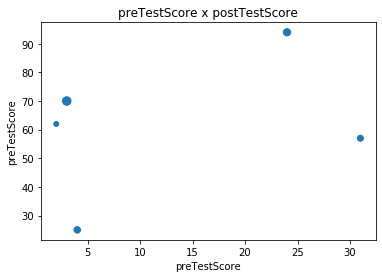

In [34]:
plt.scatter(df.preTestScore, df.postTestScore, s=df.age)

#set labels and titles
plt.title("preTestScore x postTestScore")
plt.xlabel('preTestScore')
plt.ylabel('preTestScore')

### Step 4. Create a Scatterplot of preTestScore and postTestScore.
##### This time the size should be 4.5 times the postTestScore and the color determined by sex

Text(0, 0.5, 'preTestScore')

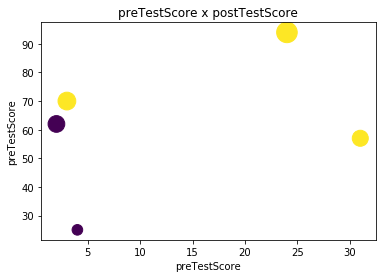

In [35]:
plt.scatter(df.preTestScore, df.postTestScore, s= df.postTestScore * 4.5, c = df.female)

#set labels and titles
plt.title("preTestScore x postTestScore")
plt.xlabel('preTestScore')
plt.ylabel('preTestScore')

# Online Retails Purchase
### Introduction:
### Step 1. Import the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Step 2. Import the dataset from this address: https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv
### Step 3. Assign it to a variable called online_rt
##### Note: if you receive a utf-8 decode error, set encoding = 'latin1' in pd.read_csv().

In [39]:
url ='https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'

In [41]:
online_rt = pd.read_csv(url, encoding = 'latin1')

In [42]:
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

In [50]:
online_rt.groupby('Country').sum().sort_values('Quantity', ascending=False).head(15)

,Quantity,UnitPrice,CustomerID
Country,,,
United Kingdom,4263829,2.245715e+06,5.626433e+09
Netherlands,200128,6.492550e+03,3.419054e+07
EIRE,142637,4.844719e+04,1.103917e+08
Germany,117448,3.766600e+04,1.200751e+08
France,110480,4.303199e+04,1.076489e+08
Australia,83653,4.054750e+03,1.569300e+07
Sweden,35637,1.806830e+03,6.790083e+06
Switzerland,30325,6.813690e+03,2.377592e+07
Spain,26824,1.263345e+04,3.268929e+07


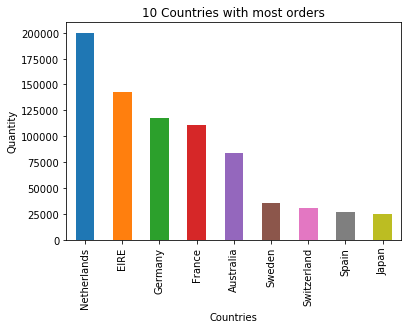

In [53]:
online_rt.groupby('Country').sum().sort_values('Quantity', ascending=False)[1:10]['Quantity'].plot(kind='bar')
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countries with most orders')

# show the plot
plt.show()

### Step 5. Exclude negative Quantity entries

In [55]:
online_rt[online_rt['Quantity'] > 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

In [58]:
top_3 = online_rt.groupby('Country').sum().sort_values('Quantity', ascending=False)[1:4]

In [64]:
top_3.iloc[0]['Quantity']

200128.0

Text(0, 0.5, 'UnitPrice')

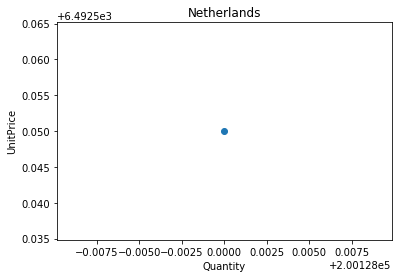

In [67]:
plt.scatter(top_3.iloc[0]['Quantity'], top_3.iloc[0]['UnitPrice'])
plt.title('Netherlands')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')

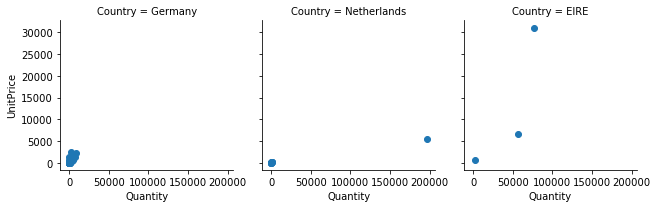

In [68]:
# groupby CustomerID
customers = online_rt.groupby(['CustomerID','Country']).sum()

# there is an outlier with negative price
customers = customers[customers.UnitPrice > 0]

# get the value of the index and put in the column Country
customers['Country'] = customers.index.get_level_values(1)

# top three countries
top_countries =  ['Netherlands', 'EIRE', 'Germany']

# filter the dataframe to just select ones in the top_countries
customers = customers[customers['Country'].isin(top_countries)]

#################
# Graph Section #
#################

# creates the FaceGrid
g = sns.FacetGrid(customers, col="Country")

# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)

# adds legend
g.add_legend()